## Implementing XGBClassifier model

Importing Libraries

In [289]:
import pandas as pd
import numpy as np

In [290]:
data=pd.read_excel("/content/loan.xlsx")

In [291]:
data.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


Checking Outliers

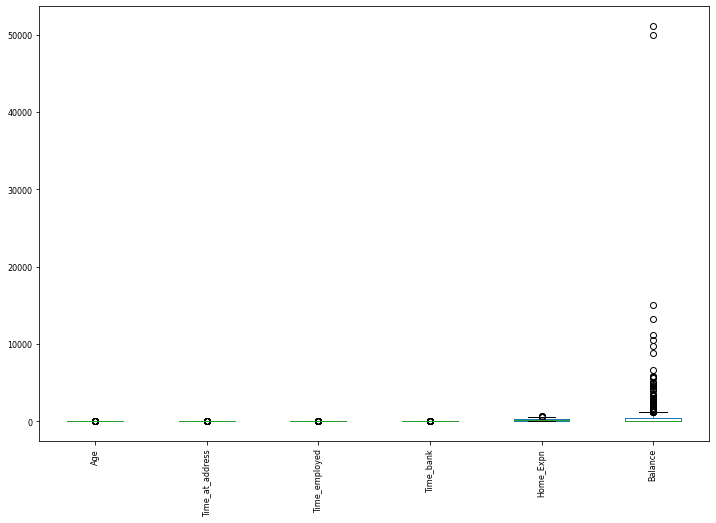

In [292]:
boxplot = data. boxplot(figsize = (12,8), rot = 90, fontsize= '8', grid = False)

In [293]:
X=data.iloc[:,:-1]
X.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0


In [294]:
y=data.iloc[:,-1]
y.head()

0    reject
1    reject
2    accept
3    accept
4    reject
Name: Decision, dtype: object

One Hot Encoding

In [295]:
X_encoded=pd.get_dummies(X,columns=['Sex','Res_status','Telephone','Occupation','Job_status','Liab_ref','Acc_ref'])

In [296]:
X_encoded.head()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Sex_F,Sex_M,Res_status_owner,Res_status_rent,...,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_
0,50.750000,0.585,0,0,145,0,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
1,19.670000,10.000,0,0,140,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
2,52.830002,15.000,5,14,0,2200,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0


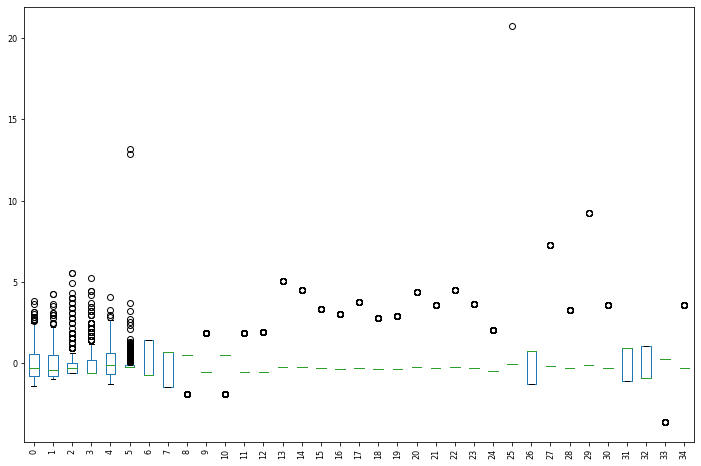

In [297]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_X=sc.fit_transform(X_encoded)
boxplot1 = pd.DataFrame(scaled_X). boxplot(figsize = (12,8), rot = 90, fontsize= '8', grid = False)

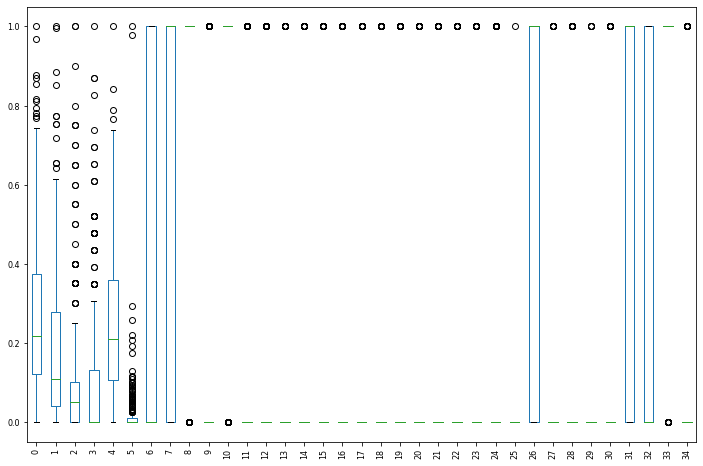

In [298]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
ms_scaled_X=ms.fit_transform(X_encoded)
#boxplot = pd.DataFrame(scaled_X_train). boxplot(figsize = (12,8), rot = 90, fontsize= '8', grid =True)
boxplot1 = pd.DataFrame(ms_scaled_X). boxplot(figsize = (12,8), rot = 90, fontsize= '8', grid = False)


Encoding Target Variable

In [299]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_encoded=le.fit_transform(y)

In [300]:
y_encoded

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

Spiliting Training & Testing Data

In [301]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y_encoded,test_size=0.25,shuffle=True)

Scaling the Data using StandardScaler

In [302]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_X_train=sc.fit_transform(X_train)
scaled_X_test=sc.transform(X_test)

(321, 35)
(108, 35)


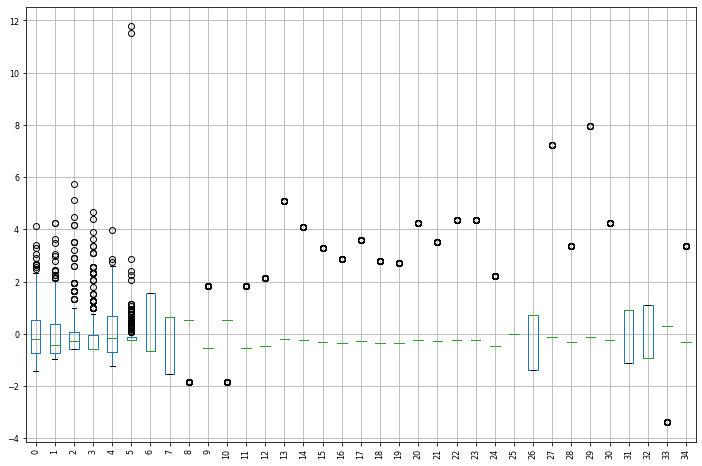

In [303]:
print(scaled_X_train.shape)
print(scaled_X_test.shape)
boxplot = pd.DataFrame(scaled_X_train). boxplot(figsize = (12,8), rot = 90, fontsize= '8', grid =True)

Importing XGBclassifier with default parameters

In [304]:
from xgboost import XGBClassifier

In [305]:
XGB_model=XGBClassifier()                                                         #Building model

In [306]:
XGB_model.fit(scaled_X_train,y_train)                                             #Fitting the model with scaled data        

XGBClassifier()

Displaying Default parameters


In [307]:
XGB_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [308]:
y_pred=XGB_model.predict(scaled_X_test)

Displaying Accuracy_score of the model

In [309]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('\nConfusion Matrix\n',confusion_matrix(y_test,y_pred))

Accuracy Score 0.7870370370370371

Confusion Matrix
 [[31 19]
 [ 4 54]]


In [310]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error","logloss"]
%time XGB_model.fit(X_train, y_train,eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.832874	validation_0-error:0.214953	validation_0-logloss:0.658145	validation_1-auc:0.772241	validation_1-error:0.222222	validation_1-logloss:0.663633
[1]	validation_0-auc:0.857385	validation_0-error:0.193146	validation_0-logloss:0.628374	validation_1-auc:0.807069	validation_1-error:0.240741	validation_1-logloss:0.635848
[2]	validation_0-auc:0.859568	validation_0-error:0.196262	validation_0-logloss:0.603468	validation_1-auc:0.810517	validation_1-error:0.212963	validation_1-logloss:0.613651
[3]	validation_0-auc:0.863443	validation_0-error:0.183801	validation_0-logloss:0.579485	validation_1-auc:0.806724	validation_1-error:0.240741	validation_1-logloss:0.594621
[4]	validation_0-auc:0.868872	validation_0-error:0.17134	validation_0-logloss:0.560268	validation_1-auc:0.807586	validation_1-error:0.240741	validation_1-logloss:0.576484
[5]	validation_0-auc:0.869561	validation_0-error:0.168224	validation_0-logloss:0.542031	validation_1-auc:0.80931	validation_1-error:0.222222	

XGBClassifier()

Plotting Classification Error & Logistic Loss

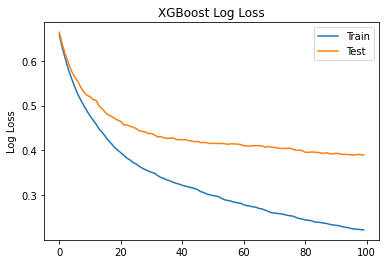

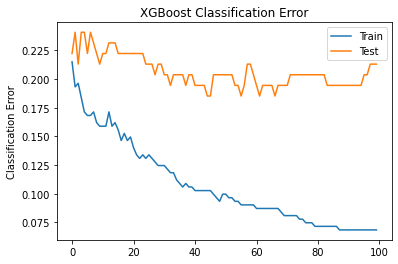

In [311]:
from matplotlib import pyplot
# retrieve performance metrics
results = XGB_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

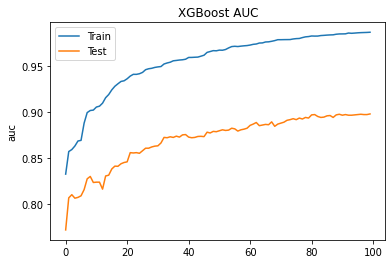

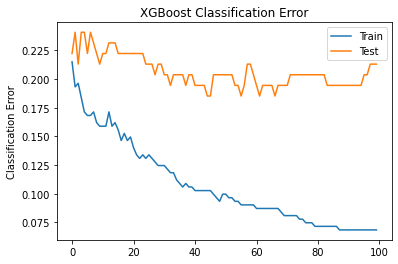

In [312]:
from matplotlib import pyplot
# retrieve performance metrics
results = XGB_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot auc
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('auc')
pyplot.title('XGBoost AUC')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

Fine Tuning XGBoostClassifier model

In [313]:
from xgboost import XGBClassifier

Params:
  n_estimator=10,
  max_depth=2,
  learning_rate=0.1
  early_stopping_rounds(to avoid overfitting)=30,
  min_child_weight(Max no. of residues allowed in leaf nodes)=0

In [314]:
XGB_model2=XGBClassifier(n_estimator=10,max_depth=2, objective='binary:logistic',learning_rate=0.1,early_stopping_rounds=30,min_child_weight=0)

In [315]:
XGB_model2.fit(scaled_X_train,y_train)                                            # fit the model

XGBClassifier(early_stopping_rounds=30, max_depth=2, min_child_weight=0,
              n_estimator=10)

In [316]:
y_pred2=XGB_model2.predict(scaled_X_test)

Displaying Accuracy_score

In [317]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score',accuracy_score(y_test,y_pred2))
print('\nConfusion Matrix\n',confusion_matrix(y_test,y_pred2))

Accuracy Score 0.8148148148148148

Confusion Matrix
 [[32 18]
 [ 2 56]]


In [318]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error","logloss"]
XGB_model2.fit(X_train, y_train,eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.785605	validation_0-error:0.246106	validation_0-logloss:0.663537	validation_1-auc:0.746379	validation_1-error:0.314815	validation_1-logloss:0.665511
[1]	validation_0-auc:0.817393	validation_0-error:0.23676	validation_0-logloss:0.638501	validation_1-auc:0.760345	validation_1-error:0.25	validation_1-logloss:0.640879
[2]	validation_0-auc:0.827681	validation_0-error:0.224299	validation_0-logloss:0.616527	validation_1-auc:0.765172	validation_1-error:0.25	validation_1-logloss:0.623255
[3]	validation_0-auc:0.844362	validation_0-error:0.208723	validation_0-logloss:0.598763	validation_1-auc:0.789655	validation_1-error:0.259259	validation_1-logloss:0.607281
[4]	validation_0-auc:0.844048	validation_0-error:0.227414	validation_0-logloss:0.582726	validation_1-auc:0.788276	validation_1-error:0.259259	validation_1-logloss:0.591977
[5]	validation_0-auc:0.84867	validation_0-error:0.224299	validation_0-logloss:0.569327	validation_1-auc:0.791724	validation_1-error:0.259259	validati

XGBClassifier(early_stopping_rounds=30, max_depth=2, min_child_weight=0,
              n_estimator=10)

Comparing Results of Default XGBmodel & Fine-Tuned XGBmodel


Tried Parameter Tuning



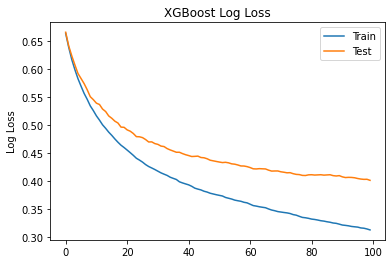


Previous Model



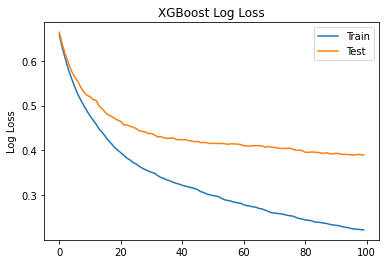

In [319]:
from matplotlib import pyplot
# retrieve performance metrics
results = XGB_model2.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
print('\nTried Parameter Tuning\n')
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

#previous model
print('\nPrevious Model\n')
results = XGB_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()


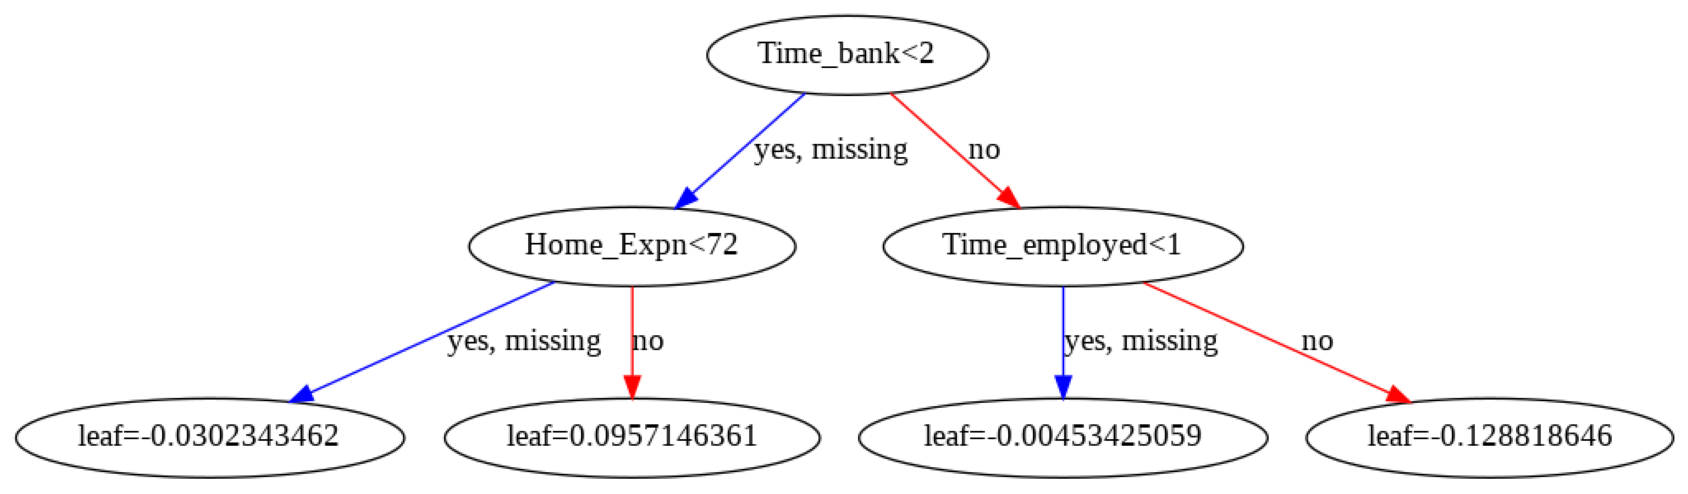

In [320]:
from xgboost import plot_tree
plot_tree(XGB_model2, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(30, 15)

#Implementing SVM on Loan Dataset 

In [321]:
from sklearn import svm

SVM Linear kernel

In [322]:
model_linear=svm.SVC(kernel='linear', C=0.1)
model_linear.fit(scaled_X_train,y_train)                                                       # Fit the SVM model

SVC(C=0.1, kernel='linear')

In [323]:
y_pred_svm_linear=model_linear.predict(scaled_X_test)                                                      #predicting the test results

In [324]:
model_linear.support_vectors_                                                            #displaying the support vectors

array([[-1.05678028,  1.01187846, -0.25692835, ..., -0.90766934,
         0.29687639, -0.29687639],
       [-0.68321055,  1.45029775, -0.57292068, ...,  1.10172279,
         0.29687639, -0.29687639],
       [-0.46589353, -0.84495616, -0.25692835, ...,  1.10172279,
         0.29687639, -0.29687639],
       ...,
       [-0.48115961, -0.87899813,  0.37505632, ...,  1.10172279,
         0.29687639, -0.29687639],
       [-0.21175835, -0.20022192, -0.57292068, ...,  1.10172279,
         0.29687639, -0.29687639],
       [-0.69039458,  1.65661271, -0.57292068, ..., -0.90766934,
         0.29687639, -0.29687639]])

In [325]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred_svm_linear)
print('\nConfusion Matrix:\n',cm)
acc=accuracy_score(y_test,y_pred_svm_linear)
print('\nAccurcy Score:\n',acc)


Confusion Matrix:
 [[29 21]
 [ 3 55]]

Accurcy Score:
 0.7777777777777778


SVM Kernel polynomial: finding the optimal value for degree of the polynomial 


In [326]:
for i in range(1,10):
  model_poly=svm.SVC(C=100,kernel='poly',degree=i)
  model_poly.fit(scaled_X_train,y_train)
  model_poly.support_vectors_
  y_pred_svm_poly=model_poly.predict(scaled_X_test)
  from sklearn.metrics import accuracy_score, confusion_matrix
  cm=confusion_matrix(y_test,y_pred_svm_poly)
  print("Confusion Matrix\n",cm)
  accuracy=accuracy_score(y_test,y_pred_svm_poly)
  print("Accuracy",accuracy)

Confusion Matrix
 [[30 20]
 [ 4 54]]
Accuracy 0.7777777777777778
Confusion Matrix
 [[33 17]
 [20 38]]
Accuracy 0.6574074074074074
Confusion Matrix
 [[35 15]
 [19 39]]
Accuracy 0.6851851851851852
Confusion Matrix
 [[34 16]
 [18 40]]
Accuracy 0.6851851851851852
Confusion Matrix
 [[33 17]
 [17 41]]
Accuracy 0.6851851851851852
Confusion Matrix
 [[25 25]
 [14 44]]
Accuracy 0.6388888888888888
Confusion Matrix
 [[24 26]
 [11 47]]
Accuracy 0.6574074074074074
Confusion Matrix
 [[19 31]
 [ 7 51]]
Accuracy 0.6481481481481481
Confusion Matrix
 [[14 36]
 [ 7 51]]
Accuracy 0.6018518518518519


SVM Polynomial model

In [327]:
model_poly=svm.SVC(C=100,kernel='poly', degree=1)                                             # Fit the SVM model
model_poly.fit(scaled_X_train,y_train)       
y_pred_svm_poly=model_poly.predict(scaled_X_test)                                             #predicting the test results                                               

In [328]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred_svm_poly)
print(cm)
acc=accuracy_score(y_test,y_pred_svm_poly)
print(acc)

[[30 20]
 [ 4 54]]
0.7777777777777778


SVM RBF model

In [329]:
model_rbf=svm.SVC(C=1,kernel='rbf', gamma=0.01)                                            # Fit the SVM model
model_rbf.fit(scaled_X_train,y_train)       
y_pred_rbf=model_rbf.predict(scaled_X_test)                                                #predicting the test results                                               

In [330]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred_rbf)                                            #Confusion Matrix for RBF kernel
print(cm)
accuracy=accuracy_score(y_test,y_pred_rbf)
print(accuracy)                                                                   #Accuracy       

[[30 20]
 [ 3 55]]
0.7870370370370371


# Implementing Logistic Regression on Loan Dataset

In [331]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=50)                                          
logmodel.fit(scaled_X_train,y_train)                                              #fit the Logistic Regression model

LogisticRegression(max_iter=50)

In [332]:
log_pred= logmodel.predict(scaled_X_test)

In [333]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,log_pred)
print('\nConfusion Matrix:\n',cm)
acc=accuracy_score(y_test,log_pred)
print('\nAccurcy Score:\n',acc)
result=classification_report(y_test,log_pred)
print('\nClassification Report\n',result )


Confusion Matrix:
 [[33 17]
 [ 6 52]]

Accurcy Score:
 0.7870370370370371

Classification Report
               precision    recall  f1-score   support

           0       0.85      0.66      0.74        50
           1       0.75      0.90      0.82        58

    accuracy                           0.79       108
   macro avg       0.80      0.78      0.78       108
weighted avg       0.80      0.79      0.78       108



Performing XGBRegressor & Linear Regression on Boston Data

In [334]:
import pandas as pd

In [335]:
#pip install --upgrade xlrd

In [336]:
housing_data=pd.read_excel('/content/boston housing.xls')

In [337]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


Checking Outliers

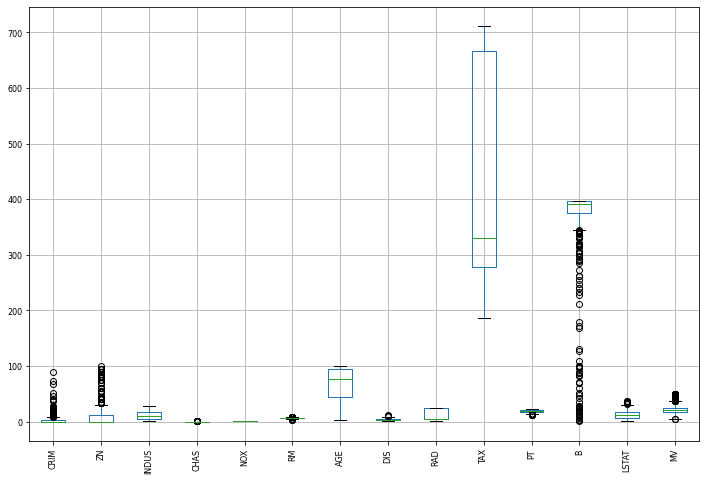

In [338]:
import matplotlib.pyplot as plt
boxplot = housing_data.boxplot(figsize = (12,8), rot = 90, fontsize= '8', grid =True)
#plt.boxplot()

In [339]:
X=housing_data.iloc[:,:-1]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


In [340]:
y=housing_data.iloc[:,-1].values
y

array([24.        , 21.60000038, 34.70000076, 33.40000153, 36.20000076,
       28.70000076, 22.89999962, 27.10000038, 16.5       , 18.89999962,
       15.        , 18.89999962, 21.70000076, 20.39999962, 18.20000076,
       19.89999962, 23.10000038, 17.5       , 20.20000076, 18.20000076,
       13.60000038, 19.60000038, 15.19999981, 14.5       , 15.60000038,
       13.89999962, 16.60000038, 14.80000019, 18.39999962, 21.        ,
       12.69999981, 14.5       , 13.19999981, 13.10000038, 13.5       ,
       18.89999962, 20.        , 21.        , 24.70000076, 30.79999924,
       34.90000153, 26.60000038, 25.29999924, 24.70000076, 21.20000076,
       19.29999924, 20.        , 16.60000038, 14.39999962, 19.39999962,
       19.70000076, 20.5       , 25.        , 23.39999962, 18.89999962,
       35.40000153, 24.70000076, 31.60000038, 23.29999924, 19.60000038,
       18.70000076, 16.        , 22.20000076, 25.        , 33.        ,
       23.5       , 19.39999962, 22.        , 17.39999962, 20.89

Splitting Data for Training & Testing

In [341]:
from sklearn.model_selection import train_test_split

In [342]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75, shuffle=True,random_state=42)

In [343]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Scaling Data from -1 to 1 using Standard Scaler

(379, 13)
(127, 13)


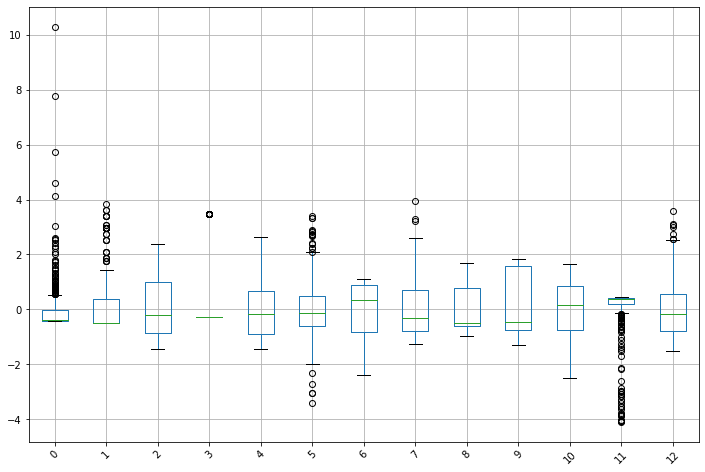

In [344]:
sc=StandardScaler()
scaled_X_train=sc.fit_transform(X_train)
scaled_X_test=sc.transform(X_test)

print(scaled_X_train.shape)
print(scaled_X_test.shape)
boxplot1=pd.DataFrame(scaled_X_train).boxplot(figsize=(12,8),rot=45)

Normalizing Data from 0 to 1 using MinMax Scaler

(379, 13)
(127, 13)


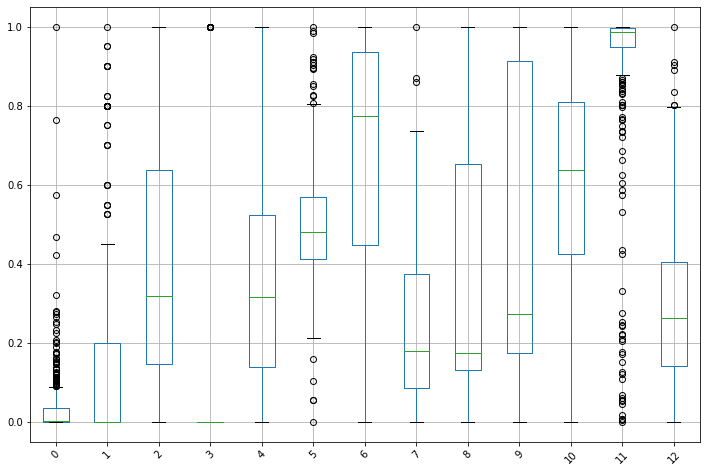

In [345]:
ms=MinMaxScaler()
normalized_X_train=ms.fit_transform(X_train)
normalized_X_test=ms.transform(X_test)

print(normalized_X_train.shape)
print(normalized_X_test.shape)
boxplot1=pd.DataFrame(normalized_X_train).boxplot(figsize=(12,8),rot=45)

Importing Libraries

In [346]:
import xgboost 
from xgboost import plot_tree

In [347]:
from xgboost.sklearn import XGBRegressor
xgb_linear=XGBRegressor(objective='reg:linear')

In [348]:
xgb_linear.fit(scaled_X_train,y_train)                                            #Fitting the model

[00:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [349]:
y_pred_XGB=xgb_linear.predict(scaled_X_test)

Checking the model performance using RMSE(Root Mean Squared Error)

In [350]:
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test,y_pred_XGB ))
print("RMSE : % f" %(rmse))                                                       #RMSE of XGBRegressor model
print("Accuracy:",xgb_linear.score(scaled_X_test,y_test))                         #Accuracy of XGBRegressor model 


RMSE :  3.181035
Accuracy: 0.8554991695666598


Plotting XGBRegressor model

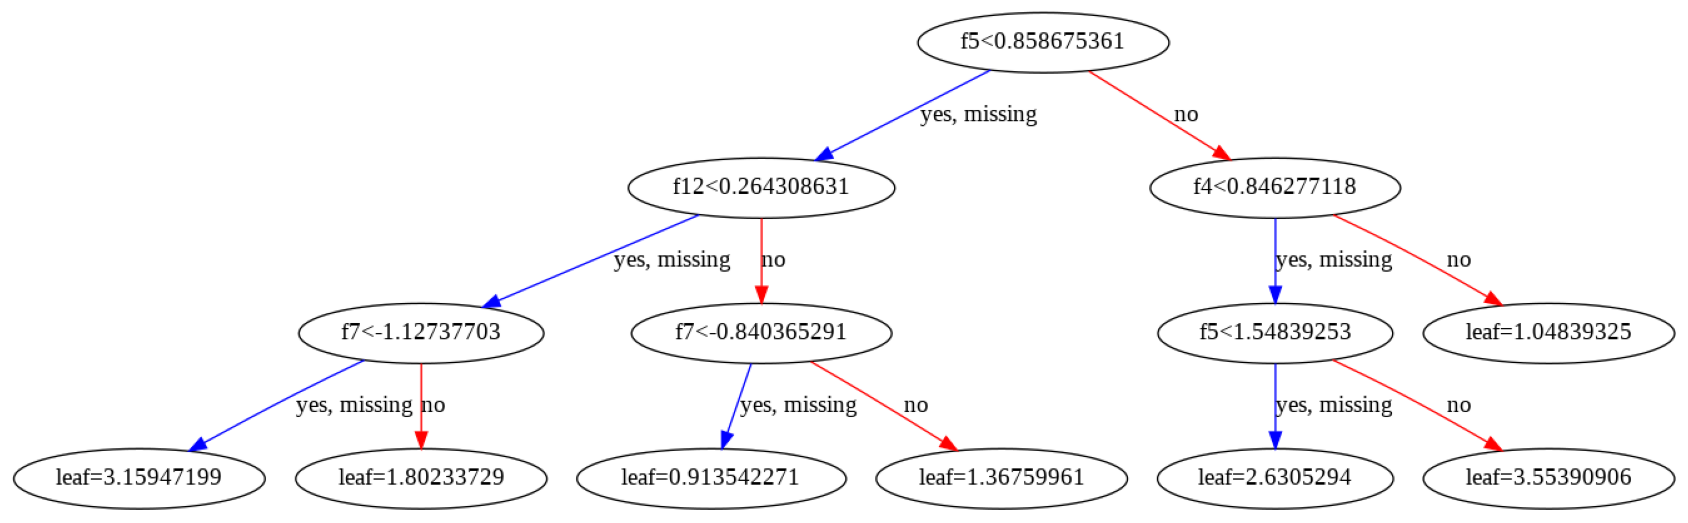

In [351]:
plot_tree(xgb_linear, num_trees=2)
fig1 = plt.gcf()
fig1.set_size_inches(30, 15)

Implementing Linear Regression

In [352]:
from sklearn.linear_model import LinearRegression

In [353]:
linear_reg=LinearRegression()

In [354]:
linear_reg.fit(scaled_X_train,y_train)                                          # Fitting the Linear Regression Model

LinearRegression()

In [355]:
y_pred_linear=linear_reg.predict(scaled_X_test)

Checking the model performance using RMSE(Root Mean Squared Error)

In [356]:
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test,y_pred_linear ))
print("RMSE : % f" %(rmse))

RMSE :  4.700925


In [357]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy=linear_reg.score(scaled_X_test,y_test)
print("Accuracy",accuracy)                                                                   #Accuracy       

Accuracy 0.6844267525946122
